## Social Network Analysis Group Project

*Description*

Network of pollinators co-occurence. Two animal species are connected if they visit the same plant. Weights represent how many plants they have in common.
Original data: Robertson, C. 1929. Flowers and insects: lists of visitors to four hundred and fifty-three flowers. Carlinville, IL, USA, C. Robertson.
Sampling methods: Marlin, J. C. & LaBerge, W. E. 2001. The native bee fauna of Carlinville, Illinois, revisited after 75 years: a case for persistence. Conserv. Ecol. 5.

**Group $S$**

* Valerio Romano Cadura
* Ferdinando Giordano
* Muhammad Khair Hindawi
* Lorenzo Mainetti



### Week 1 ###

a) Pick a social network among the one proposed on luiss.learn

b) Implement it in Python

c) Draw a subgraph of the graph (explain how you chose the subgraph)

d) Compute the number of nodes,edges, average degree and the density.


**Importing packages**


In [1]:
import random
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import collections
from timeit import default_timer as timer
import itertools
import math
import sklearn

np.set_printoptions(threshold=10000)

a) **Importing the data**

In [2]:
with open('C:/Users/Valerio Cadura/Desktop/Uni/Programmi_Luiss/Social_Network_Analysis/Plant_pollinator_cohabitation.txt') as file:
    data = file.read().splitlines()
    edge_list = [line.split() for line in data]
    edge_repr = [list(map(int, item)) for item in edge_list]

#     print(edge_list)


b) **Creating the Graph**


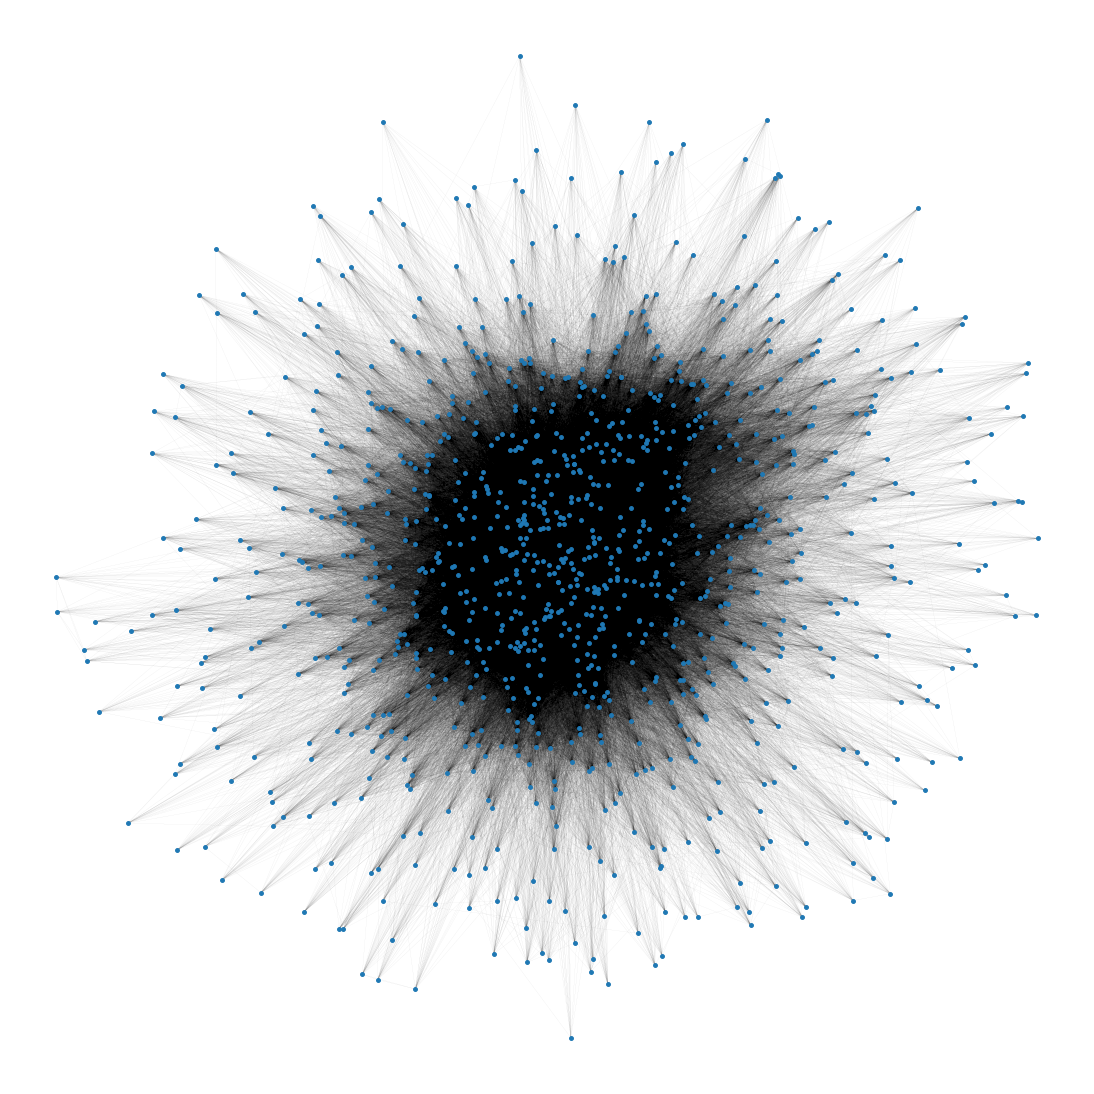

In [3]:
G=nx.from_edgelist(edge_repr)
plt.figure(3,figsize=(15,15)) 
nx.draw(G, node_size=15, width=0.02)
# nx.draw(G)

After drawing the graph we can see it is a a giant graph with a really dense component in the middle. 


**Computing basic knowledge of the graph**

*Average Degree*
$$ <k> = \frac{2L}{N} $$

*Density*
$$  d  = \frac{<k>}{N-1} $$

In [4]:
print('\nInformation about the graph.\n')
print('G is an undirected, unweighted graph.\n')
booli = nx.is_connected(G)
print(f'Is the graph G connected?: {booli}\n')
boole = nx.is_weighted(G)
# print(f'Is the graph G weighted?: {boole}\n')

L = G.number_of_edges()
print(f'    #Edges: {L}\n')

N = G.number_of_nodes()
print(f'    #Nodes: {N}\n')

avg_degree = round(2*L / N,2)
print(f'    Average Degree: {avg_degree}\n')

density = round(avg_degree / (N - 1),2)
print(f'    Density: {density}\n')


Information about the graph.

G is an undirected, unweighted graph.

Is the graph G connected?: True

    #Edges: 115422

    #Nodes: 1044

    Average Degree: 221.11

    Density: 0.21



The number of edges is relatively high considering the number of nodes. The average degree contains this information, we know that on average a node is connected to 221 nodes hence on a good portion of the other nodes.

**Obtaining the adjacency matrix.**

We think that obtaining the adjacency matrix can be useful later to compute other statistics. In our case since the graph is undirected and unweighted the adjacency matrix analysis is not complicated because each i-th column/row contain the degree of the i-th node.

In [5]:
adj_matrix = nx.to_numpy_matrix(G,dtype='int64')
print(adj_matrix)
# print(np.sum(adj_matrix[3]))
# print(np.sum(adj_matrix[17]))

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


c) **Picking the highly connected nodes. (degree > 500)**

In order to visualize a subgraph we decided to pick highly connected nodes, after seeing that the average degree is 221 we chose to pick a higher number as 500 so that the number of nodes falling in this class wouldn't be that high.

All the nodes in the obtained subgraph will have
$$ k > 500 $$

(!! Nodes with degree > $500$ disconnected from the main component of the subgraph will not be drawn but are still part of the subgraph.)


In [6]:
# Obtaining the list of the node degrees
list_of_sums = np.sum(adj_matrix, axis=1)
# print(list_of_sums)

above_500 = np.array(list_of_sums[list_of_sums > 500])
# print(list_of_sums)
# print(above_500)

# Obtaining the list of boolean checking the degree condition
is_highly_connected = [True if i > 500 else False for i in list_of_sums]

# Obtaining the indices of the boolean value obtained above
highly_connected_ind = [i for i,x in enumerate(is_highly_connected) if x]

**Unpacking the numpy array in order to scale nodes by their degree.**

In [7]:
from functools import reduce
from operator import add

listed_degrees = above_500.tolist()
listed_degrees = reduce(add, listed_degrees)
listed_degrees = [(i-np.mean(listed_degrees))/np.std(listed_degrees) for i in listed_degrees]

# print(len(pos))
# print(len(listed_degrees))
# print(listed_degrees)

d) **Drawing the subgraph**

The function subgraph returns a view of the subgraph induced on nodes. The induced subgraph of the graph contains the nodes in nodes and the edges between those nodes. We chose the kamada kawai visualization because for this number of nodes we think is the most clear.


Here we show the list of nodes which we passed into the subgraph function but being not connected are not considered while 
building the subgraph:

-[10, 17, 26, 29, 32, 48, 49, 63, 73, 80, 98, 101, 127, 130, 171, 176, 180, 202, 268, 309, 409, 499, 503, 508]


The subgraph with the selected nodes is drawn below.

(!!From the picture the subgraph may seem connected but it's not. 
Nodes drawn in the picture are 63 but nodes contained in sub_nodes are 64.)


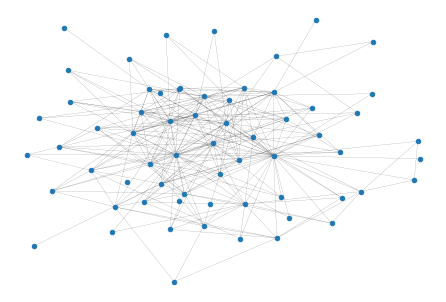

In [8]:
subG = G.subgraph(highly_connected_ind)
pos = nx.spring_layout(subG)
sub_degrees = subG.degree
sub_nodes = subG.nodes()

nodes = [x[0] for x in sub_degrees]

missing = [x for x in highly_connected_ind if x not in nodes]
print(f'\nHere we show the list of nodes which we passed into the subgraph function but being not connected are not considered while \nbuilding the subgraph:\n\n-{missing}\n\n')

print('The subgraph with the selected nodes is drawn below.\n')

nx.draw_kamada_kawai(subG, node_size=20, width=0.1)

print("(!!From the picture the subgraph may seem connected but it's not. \nNodes drawn in the picture are 63 but nodes contained in sub_nodes are 64.)")

**Computing basic knowledge about the subgraph**

*Average Degree*
$$ <k> = \frac{2L}{N} $$

*Density*
$$  d  = \frac{<k>}{N-1} $$

In [9]:
print('\nInformation about the subgraph.\n')

booli = nx.is_connected(subG)
print(f' Is the subgraph G connected?: {booli}\n')

L_sub = subG.number_of_edges()
print(f'    #Edges: {L_sub}\n')

N_sub = subG.number_of_nodes()
print(f'    #Nodes: {N_sub}\n')

avg_degree_sub = round(2*L_sub / N_sub,2)
print(f'    Average Degree: {avg_degree_sub}\n')

density_sub = round(avg_degree_sub / (N_sub - 1),2)
print(f'    Density: {density_sub}\n')


Information about the subgraph.

 Is the subgraph G connected?: False

    #Edges: 267

    #Nodes: 64

    Average Degree: 8.34

    Density: 0.13



### Week 2 ###

While considering the largest component of your network. Depending on what you prefer/seems
more relevant in your graph,

a) Compute Average distance and Diameter,

b) Improve the function computing the inverse distance function. (can be found below)

or 

a’) Compute Average clustering and Transitivity number,

b’) Implement a function computing the transitivity using basic function of networkx

a) **Computing Average Distance and Diameter using networkx built-in functions**

*Average Path Length*
$$AvgPathLength = \frac{1}{N-1} \cdot \sum_{i\in G,j\in G} l(i,j)$$

*Diameter*
$$ Diameter = \max_{i,j \in G} l(i,j)$$

In [10]:
avg_distance_length = nx.average_shortest_path_length(G)
print(f'\nAverage Distance Length: {round(avg_distance_length,2)}\n')

diameter = nx.diameter(G)
print(f'Diameter: {diameter}')


Average Distance Length: 1.79

Diameter: 3


The average distance length is pretty low, this let us understand that the efficiency of information transport is high, therefore we can hypothesize the presence of hubs. The average distance length tell us that in the average case you will need $1.79$ steps to move from one node to another in the graph, while the diameter warn us about the worst case scenario, moving from one node to another will take at most $3$ steps.

a') **Computing Average Clustering and Transitivity number**

*Average Clustering*
$$ <C> = \frac{1}{N} \cdot \sum_{i\in G} C(i) $$

*Transitivity Number*
$$ T = \frac{no. triangles}{no. wedges \cdot \frac{1}{3}} = \frac{no. triangles}{\sum_{i} k_{i}\cdot (k_{i} - 1)}$$

In [11]:
avg_clustering_coeff = nx.average_clustering(G)
print(f'\nAverage Clustering: {round(avg_clustering_coeff,2)}\n')

transitivity_number = nx.transitivity(G)
print(f'Transitivity Number: {round(transitivity_number,2)}\n')

#We compute the transitivity two times, once with the built-in function the second time with the formula.
no_wedges = 0
for i in G.degree:
    no_wedges += (i[1]*(i[1]-1))/2

no_triangles = sum(nx.triangles(G).values())
#In the formula is not necessary to multiply the number of triangles by 3 because the built-in function triangles already-
#returns the 3*#_triangles

transitivity_basic = no_triangles/no_wedges
print(f"b') Transitivity Basic: {round(transitivity_basic, 2)}")


Average Clustering: 0.7

Transitivity Number: 0.5

b') Transitivity Basic: 0.5


Considering the short average shortest path length and the high average clustering coefficient, we can tell the graph G 
is an example of a "Small-World" network therefore any two nodes can reach each other through a short sequence of edges. 

Furthermore we can check that 
$$ l_{G} \propto log(N) $$

In [12]:
print('\nlogN: ',round(math.log(N,10),2))
print()
print(f'Average Path Length: {round(avg_distance_length,2)}\n')


logN:  3.02

Average Path Length: 1.79



Hence
$$ l_{G} \le log(N) $$

Since the average path length is smaller than the logarithm of the nodes we can tell we are in a ultra small world network.

**Computing the distance table**

We know that the nodes are 1044 so we would need a 1044 x 1044 matrix to contain the distances,
but since nodes names were randomly assigned, we've decided to avoid remapping to 0-1044 all the nodes
we noticed that the nodes with the "largest" name was $1427$ so we exploited the fact and just created a bigger matrix.

(!!It is important to ignore the null rows and columns of the matrix when computing statistics otherwise we would obtain
biased/altered values.)

In [13]:
distances = dict(nx.shortest_path_length(G))
# print(list(list(distances.items())[1]))
distance_matrix = np.eye(1428,1428, dtype = 'int64')*0
counter = 0
for i in list(distances.items()):
    for j in i[1].items():
        distance_matrix[i[0],j[0]] = j[1]

# print(sum(distance_matrix[141] == 1))

# print(sum([1 for i in distance_matrix[66] if i != 0]))
# print((np.sum(distance_matrix))/1089936)

### Week 3 ###

Depending on what seems more relevant in your graph, pick one of the following local notions: Decay centrality, Betweeness centrality, Closeness centrality , Clustering

a) Provide a code computing the given centrality using basic functions of networkx (you are not
allowed to use directly functions of networkx).

b) Discuss why you picked this measure and who is the most central in your network based on
your choice.

c) Provide the cumulative distribution for this centrality and give a graphical representation of
your graph (log-log, log or normal representation as you think it is more relevant).


We thought that considering our graph the best centrality measure would have been decay and closeness, both of these methods uses the distance, the first one gives less weight to more distant nodes, the second one measure how close a node is to a given portion. Before computing these measures we decided to compute the degree centrality in order to use it as a benchmark.

a,b) **Computing the Centrality and obtaining the list of names**

Since we know that the graph is undirected and unweighted we can easily compute the centrality of node $i$ summing over the $i_{th}$ row or column.

$$ C_{D}(i) = k_{i} $$

We can compute the normalized degree centrality aswell by normalizing the degree centrality by $ n - 1 $ therefore:

$$ Cn_{D}(i) = \frac{k_{i}}{N -1} $$

We expect the most central node is the one with highest degree.

In [14]:
# Obtain the degree for each node
degree_centralities = [i[0] for i in list_of_sums.tolist()]
# print(np.max(degree_centralities)
degree_normalized_centralities = [i / (N-1) for i in degree_centralities]
degree_normalized_sorted = sorted(degree_normalized_centralities)

# print(data_centralities)
list_of_names = [str(i) for i in list(G.nodes)]
# print(list_of_names)


most_central = list_of_names[degree_centralities.index(max(degree_centralities))]
least_central = list_of_names[degree_centralities.index(min(degree_centralities))]
print(f'\nThe most central considering degree centrality is node: {most_central}')
print(f'\nThe least central considering degree centrality is node: {least_central}')
# It is noticeable that since the graph was generated without labels node names were assigned randomly.


The most central considering degree centrality is node: 141

The least central considering degree centrality is node: 609


**Function to compute the right row of the adjacency matrix given the name of the node**

The function takes as input the name of a node and returns the corresponding row of the adjacency matrix.

In [15]:
def name_to_row(name):
    index = list_of_names.index(name)
    row = np.matrix.tolist(adj_matrix[index])[0]
    return row

# print(sum(name_to_row('141')))
# print(sum(name_to_row('66')))

**Function to compute the adjacency matrix row index of a node given its name**

The function below takes as input the name of a node and returns the corresponding index of the adjacency matrix.

In [16]:
def name_to_indAdj(name):
    indexAdj = list_of_names.index(name)
    return indexAdj
# print(name_to_indAdj('141'))

**Function to compute the name of a node given the row of the adjacency matrix**

The function below takes as input the index of the adjacency matrix and return the name of the node.

In [17]:
def indAdj_to_name(indAdj):
    name = list_of_names[indAdj]
    return name

# print(indAdj_to_name(17))

c) **Plotting the Normalized Degree Centrality**

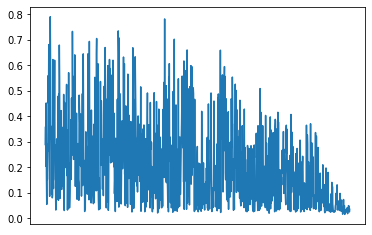

In [18]:
plt.xticks([])
# plt.yscale("log")
# We rather choose to plot without log scaling in order to see the variations between degrees clearly.
plt.plot(list_of_names,degree_normalized_centralities);

After seeing the normalized degree centrality we decided to plot the sorted normalized centralities in order to see how the degree grows and make some hypothesis on which is the right function to model the degree centrality.

In blue we have the sorted normalized degree centrality.

The orange function $f(x) = (0.9\cdot x)^\frac{3 \cdot e}{4} + 0.08$ tries to approximate the normalized degree centrality.

The green function $f(x) = x^{10} -0.15 $ tries to predict which will be the degree centrality of new hubs when the network expand. 


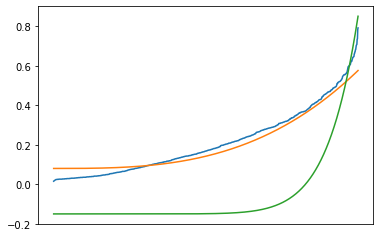

In [19]:
plt.xticks([])
plt.plot(list_of_names, degree_normalized_sorted);
plt.plot(list_of_names, ((np.linspace(0.0, 1.0, num=1044)*0.9)**3*(math.e)/4)+0.08);
plt.plot(list_of_names, (np.linspace(0.0, 1.0, num=1044)**10)-0.15);

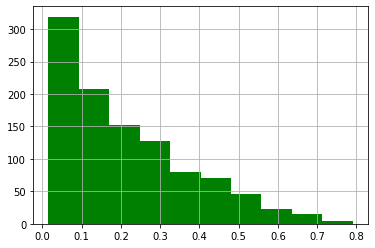

In [20]:
p = plt.hist(degree_normalized_centralities, facecolor='green') 
plt.grid(True)
plt.show()

a,b) **Computing Normalized Decay Centrality**

We know that the formula of decay centrality is:
$$ C^{decay,\delta}_{i} = \sum_{i=1}^{\infty} \delta^{l(i,j)} \hphantom2 with \hphantom2 0 < \delta < 1 $$
 
Since we have computed the distance table we can easily compute the decay centrality iterating on the matrix.

In [21]:
from math import sqrt
param = 0.2
decay_centralities = []
for i in distance_matrix:
    decay_c = np.sum([param ** j for j in i if j != 0])
    decay_centralities.append(decay_c)



# print(list_of_distances)
decay_centralities = [i for i in decay_centralities]
most_central_decay = decay_centralities.index(max(decay_centralities))
decay_min_centralities = [i if i!=0 else float('Inf') for i in decay_centralities]
least_central_decay = decay_centralities.index(min(decay_min_centralities))
print(f'\nThe most central considering decay centrality is node: {most_central_decay}')
print(f'\nThe least central considering decay centrality is node: {least_central_decay}')

# print(decay_centralities)
max_d = np.max(decay_centralities)
min_d = np.min(decay_centralities)

normalized_decay_centralities = [(i - min_d)/(max_d-min_d) for i in decay_centralities]  
plot_decay_centralities = [i for i in normalized_decay_centralities if i != 0]
# print(len(plot_decay_centralities))
sorted_decays = sorted(plot_decay_centralities)


The most central considering decay centrality is node: 141

The least central considering decay centrality is node: 1335


Again, with another measure we obtained the same node as the most central. Let's try to understand the why.

We could have expected that node 141 is again the most central considering decay centrality because decay measure values the most connections where distance = 1, hence node 141 which has the highest degree will be the one with with the highest number of distance = 1 connections because:

$$ distance = 1_{links} = degree $$

In [22]:
print('Here I print degree and sum of distances for the Decay Centrality most central | (node 141)\n')
print('    Degree: '+str(np.sum(adj_matrix[name_to_indAdj('141')]))+', Sum of Distances: '+str(sum(distance_matrix[141])))
print(f'    # Ones in the distance matrix row: {sum([i for i in (distance_matrix[141] == 1) if i])}\n')
sum_of_distances = np.sum(distance_matrix,axis=0)
print('It can be interesting to know which is the antisocial node in this graph\n')
print(f'    The highest sum of distances in the graph is: {max(np.sum(distance_matrix,axis=0))}')
print(f'    We can easily obtain the name of the antisocial node.\n')
count = 0
for i in distance_matrix:
    count +=1
    if np.sum(i,axis=0) == max(np.sum(distance_matrix,axis=0)):
        break
print(f'    The most antisocial node is: {count - 1}')

Here I print degree and sum of distances for the Decay Centrality most central | (node 141)

    Degree: 825, Sum of Distances: 1261
    # Ones in the distance matrix row: 825

It can be interesting to know which is the antisocial node in this graph

    The highest sum of distances in the graph is: 2125
    We can easily obtain the name of the antisocial node.

    The most antisocial node is: 1335


In a connected graph the decay centrality with a low parameter $ \delta = \frac{1}{5}$ the degree is what influence the most because we know that the the number of terms in the summation will be the same for each node hence the node with highest degree obtain the highest sum.

We can clearly see that node $141$ is the most central given the decay centrality because most of the distances from other nodes are $ = 1$. Regarding the least connected node we obtain a different result with respect to the last centrality measure.

**Computing Average Path Length and Diameter via vectorization**

In [23]:
average_dist_len = (np.sum(distance_matrix))/(N*N) #1044 * 1044
diam =  np.max(distance_matrix)
print(f'\nAverage Path Length: {round(average_dist_len,2)}\n')
print(f'Diameter: {diam}\n')


Average Path Length: 1.79

Diameter: 3



c) **Plotting the distribution of the normalized decay centralities**

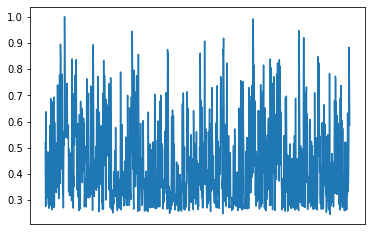

In [24]:
plt.xticks([])
# plt.yscale("log")
plt.plot(list_of_names, plot_decay_centralities);

We rather choose to plot without log scaling in order to see the variations between decay centralities clearly. 

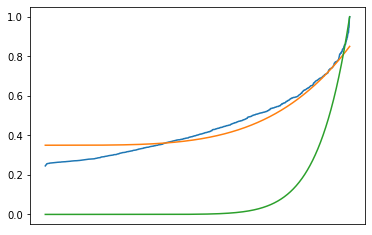

In [25]:
plt.xticks([])
plt.plot(list_of_names, sorted_decays);
plt.plot(list_of_names, ((np.linspace(0.0, 1.0, num=1044))**(1.5*(math.e))/2)+0.35);
plt.plot(list_of_names, (np.linspace(0.0, 1.0, num=1044)**10));

After seeing the decay degree centrality we decided to plot the sorted decay normalized centralities in order to see how the degree grows and make some hypothesis on which is the right function to model the decay centrality.

We found that the function in orange: natural power $f(x) = \sqrt{(x^{3/2\cdot e})}+0.35$ is a good approximation for the decay normalized centrality in our graph.

In order to predict how will hubs become when the network expand we want to find a function that approximate locally the last part of the decay centrality, it could be $f(x) = x^{10}$.

**Plotting the histogram of the normalized decay centralities**

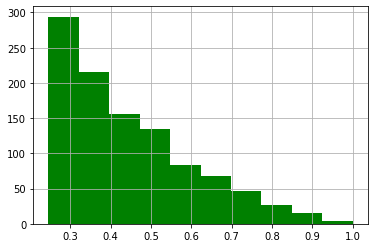

In [26]:
p = plt.hist(plot_decay_centralities, facecolor='green') 
plt.grid(True)
plt.show()

Week 2 Task b

b) **Computing the Average Inverse Length via vectorization, double checked**

*Average Inverse Path Length*
$$AvgInvPathLength = \frac{N-1}{\sum_{i\in G,j\in G} l(i,j)}$$


Coding a vectorized version of the Average Inverse Path length was not so trivial,
I wanted to exploit numpy ndarrays operational properties. The problem was that having zeros in the matrix computing
the inverse was an issue because $\frac{1}{0}$ is not defined or considered $\infty$.

First approach was to traslate the numpy matrix on the x-axis by $1$ on the right. This way I would have $1$ where I had $0$, $2$ where I had $1$, $3$ where I had $2$ and $4$ where I had $3$. Obviously the sum of the reciprocals of these new numbers is different with respect of the sum of the original matrix. In order to regularize the sum of the inverse, 
I counted the number of zeros, ones, twos and threes in the original matrix. This way I could subtract and add in order 
to regularize

Then we figured out that counting number of ones, twos and threes was enough to compute the average inverse path length.

In [27]:
# First we want to count the occurrences of each number belonging to the distance matrix
no_1 = distance_matrix == 1
no_2 = distance_matrix == 2
no_3 = distance_matrix == 3
no_0 = distance_matrix == 0

count0 = np.count_nonzero(no_0)
# print(count0)
count1 = np.count_nonzero(no_1) #for each +0.5
count2 = np.count_nonzero(no_2) #for each +0.16 and round
count3 = np.count_nonzero(no_3) #for each + 0.07 and round
# print(count1, count2, count3)
rec_sum_check = (count1 * 1) + (count2 * (1/2)) + (count3 * (1/3))


diff_from_zero = count1 + count2 + count3
# print(diff_from_zero)
# print(np.count_nonzero(distance_matrix))
# print(diff_from_zero == np.count_nonzero(distance_matrix))
# print(2039184-diff_from_zero)
distance_matrix_plus1 = distance_matrix + 1
distance_matrix_reciprocal = 1 / distance_matrix_plus1

reciprocal_sum = (np.sum(distance_matrix_reciprocal) - (count0*1) + (count1 * 0.5) + round(count2  * (1/6)) + round(count3 * (1/12)))


average_inverse_length = (N*(N-1))/ reciprocal_sum
ave_inv_length = (N*(N-1))/ rec_sum_check
print(f'\nAverage Inverse Path Length computed via traslation-first approach: {round(average_inverse_length,2)}\n')
print(f'Average Inverse Path Length computed via counting-second approach: {round(ave_inv_length,2)}')


Average Inverse Path Length computed via traslation-first approach: 1.65

Average Inverse Path Length computed via counting-second approach: 1.65


a,b) **Computing Closeness Centrality**

$$Closeness = \frac{N-1}{\sum_{i\neq j} l(i,j)}$$

In [28]:
closeness_centralities = [(N-1)/i if i!= 0 else 0 for i in sum_of_distances]
closeness_min_centralities = [i if i!=0 else float('Inf') for i in closeness_centralities]
# print(closeness_centralities)
most_central_close = closeness_centralities.index(max(closeness_centralities))
least_central_close = closeness_centralities.index(min(closeness_min_centralities))
print(f'\nThe most central considering Closeness is node: {most_central_close}')
print(f'\nThe least central considering Closeness is node: {least_central_close}')
plot_closeness = [i for i in closeness_centralities if i != 0]

sorted_closeness = sorted(plot_closeness)


The most central considering Closeness is node: 141

The least central considering Closeness is node: 1335


The most central node considering closeness centrality is $141$, it is the same result we obtained with the other measures, this confirms the centrality feature of node $141$. We could say that node $141$ is a hub connecting 825 of the 1044 nodes belonging to the graph. Regarding the least connected we obtained the same node as with the decay centrality measure.

c) **Plotting the distribution of the Normalized Closeness Centralities**

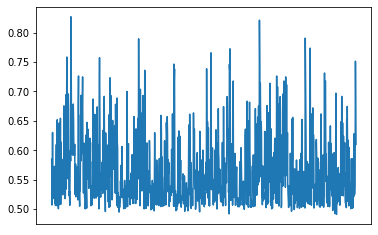

In [29]:
plt.xticks([])
# plt.yscale("log")
# We rather choose to plot without log scaling in order to see the variations clearly.

plt.plot(list_of_names, plot_closeness);

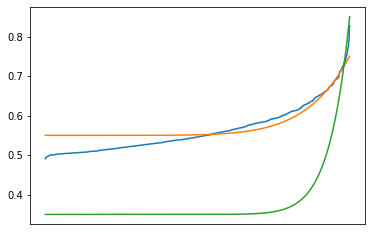

In [30]:
plt.xticks([])
plt.plot(list_of_names, sorted_closeness);
plt.plot(list_of_names, (((np.linspace(0.0, 1.0, num=1044)**(5/np.log(2)))*1/5))+0.55);
plt.plot(list_of_names, (((np.linspace(0.0, 1.0, num=1044)**15))**1/2)+0.35);

We found that the function in orange: natural power $ f(x) = x^{\frac{3}{2} \cdot \frac{5}{log(2)}} + 0.55 $ is a good approximation for the normalized closeness centrality in our graph.

In order to predict how will hubs become when the network expand we want to find a function that approximate locally the last part of the normalized closeness centrality, it could be $f(x) = \sqrt{x^{15}} + 0.35$.

**Plotting the histogram of the normalized closeness centralities.**

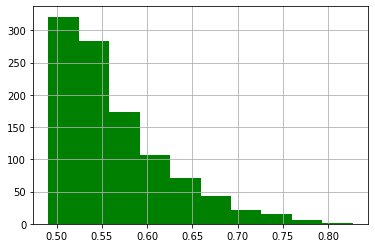

In [31]:
p = plt.hist(plot_closeness, facecolor='green') 
plt.grid(True)
plt.show()

**Computing Heterogeneity.**

*Heterogeneity*
$$ \kappa = \frac{<k^2>}{<k>^2} $$

In [32]:
adj_matrix_squared = adj_matrix ** 2
heterogeneity = (np.sum(adj_matrix_squared)/N)/(avg_degree ** 2)
print(f'\nHeterogeneity: {round(heterogeneity,2)}\n')


Heterogeneity: 1.61



**Probability of picking the node i directly.**

*Probability of picking a node i uniformly*

$$ prob(i) = \frac{1}{N} $$

In [33]:
prob_directly = 1 / N
print(f'\nProbability of picking a node directly: {"{:e}".format(prob_directly)}\n')


Probability of picking a node directly: 9.578544e-04



**Probability of picking the most connected node via the neighbor of a neighbor procedure.**

*Probability of picking the most connected node picking first a node uniformly and then a neighbor of the latter*

$$ prob(i | j) = \frac{1}{N} \cdot \sum_{j \in pred(i)} \frac{1}{k_{j}} $$

In [34]:
node_degrees = np.sum(adj_matrix,axis=1)
node_degrees = np.matrix.tolist(node_degrees)
node_degrees = [i[0] for i in node_degrees]
max_deg = np.max(node_degrees)
max_index = node_degrees.index(max(node_degrees))

neigh_to_max = np.matrix.tolist(adj_matrix[max_index])
neigh_to_max = [i for i in neigh_to_max[0]]
neighs_indexes = [i for i in range(len(neigh_to_max)) if neigh_to_max[i] != 0]
# print(neigh_to_max)
neighs_degrees = [node_degrees[i] for i in neighs_indexes]
# print(neighs_degrees)

list_prob_neighb_of_neighb = [(1/N)*(1/i) for i in neighs_degrees if i != 0]

max_prob_nxn = np.sum(list_prob_neighb_of_neighb)
print("\nHighest probability of picking i as the neighbor of a neighbor: {:e}".format(max_prob_nxn))


Highest probability of picking i as the neighbor of a neighbor: 5.593521e-03


**Function to compute the probability of the given node via the neighbor of neighbor procedure**

We built a function to do the same we did for the most connected node choosing whatever node in the graph.

(!!input must be a node name)

In [35]:
def neighbor_of_neighbor(node):
    row = name_to_row(node)
    probability = sum(1/N * 1/node_degrees[i] for i in range(len(row)) if row[i] != 0)
    return probability

**Computing the probability for every node**

In [36]:
neighbor_probability = list(map(neighbor_of_neighbor, list_of_names))
# print(neighbor_probability)

**Probability of picking an edge first**

*Probability of picking a node i, having picked an edge uniformly before*ù

$$ prob(i|e_{j}) = \frac{1}{2} \cdot \frac{k_{i}}{e} $$

In [37]:
prob_edge_first = [i*(1/L) * 1/2 for i in node_degrees if i != 0]
max_prob_e = np.max(prob_edge_first)
print("\nHighest probability of picking an edge first: {:e}".format(max_prob_e))


Highest probability of picking an edge first: 3.573842e-03


### Week 5 ###

a) Write a function to compute the PageRank of the nodes in a graph (you are not allowed to use built-in functions from NetworkX).

b) Run it on your graph using α = 0.15, save the total number of iterations, and check that your function returns
the same results (in terms of the scores) as the built-in function from NetworkX.

c) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an
interpretation to the possible difference.

d) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results.


a) **Building a function to compute PageRank**

PageRank is a centrality measure algorithm used to rank the centrality of nodes, it works by counting the number and the quality of links to determinate a rough estimate of how important the node is.

*Pagerank*
$$ R_{t}(i) = \frac{\alpha}{N} + (1 - \alpha) \cdot \sum_{j \in pred(i)} \frac{R_{t-1} (j)}{K_{out}(j)}  $$



In [38]:
init = 1/N
temp_list_of_rts = [0]*N
old_list_of_rts = [1/N]*N
list_of_rts = [0]*N
alfa = 0.8
# # print(list_of_rts)
def pagerank(alfa, old_list_of_rts, adj_matrix, list_of_rts):
    for i in range(N):
        rti = alfa/N + (1- alfa)*(sum(old_list_of_rts[j] / np.sum(adj_matrix[j]) for j in range(N) if adj_matrix[i, j] == 1))
        list_of_rts[i] = rti



b, c) *Now we compute PageRank until it converges, counting the number of iterations.*


The most central considering Pagerank is node: 141

The least central considering Pagerank is node: 609


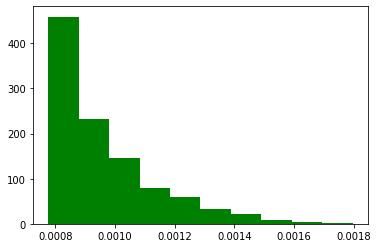

In [39]:
iter_counter = 0
while old_list_of_rts != list_of_rts:
    iter_counter += 1
    old_list_of_rts = list_of_rts[:]
    pagerank(alfa, old_list_of_rts, adj_matrix, list_of_rts)


# print(sorted(list_of_rts))
# print(np.sum(list_of_rts))
pagerank_most_central = list_of_names[list_of_rts.index(max(list_of_rts))]
pagerank_least_central = list_of_names[list_of_rts.index(min(list_of_rts))]
print(f'\nThe most central considering Pagerank is node: {pagerank_most_central}')
print(f'\nThe least central considering Pagerank is node: {pagerank_least_central}')
sorted_pagerank = sorted(list_of_rts)
plt.hist(list_of_rts, facecolor='green');

The most central node is again node 141 but as the least central we obtain the same node returned by the degree centrality.

d) **Plotting the PageRank distribution**

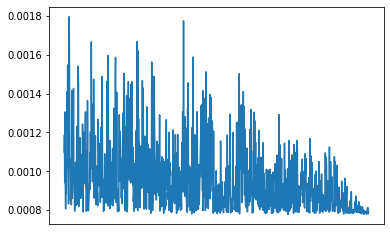

In [40]:
plt.xticks([])
# plt.yscale("log")
# We rather choose to plot without log scaling in order to see the variations clearly.

plt.plot(list_of_names, list_of_rts);

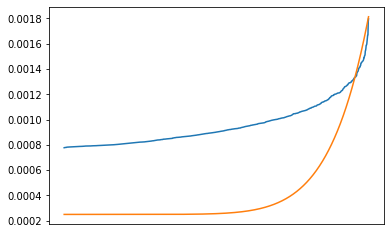

In [41]:
plt.xticks([])
plt.plot(list_of_names, sorted_pagerank);
plt.plot(list_of_names, ((np.linspace(0.0, 0.5, num=1044)**((8))*4/10))+0.00025);
# plt.plot(list_of_names, log((np.linspace(0.0, 1.0, num=1044)));

In order to predict how the pagerank scores will be influenced  when the network expand we want to find a function that approximate locally the last part of the pagerank scores plotted, it could be $f(x) = x^{8 \cdot \frac{4}{10}} + 0.00025$.

b) *We want to compare our implementation of the pagerank with the built-in function in order to check how $R_{t}(i)$ are distributed.*

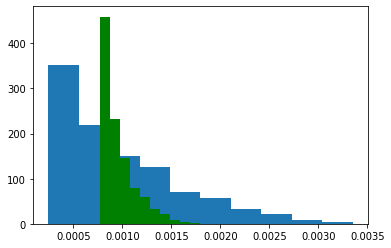

In [42]:
compare = nx.pagerank(G, alfa)

built_in_pagerank = list(compare.values())
# print(sorted(built_in_pagerank))
plt.hist(built_in_pagerank);
plt.hist(list_of_rts, facecolor='green');

**Establishing a connection between the co-occurrence graph and the original bipartite graph**

We are analyzing the co-occurrence of pollinators on plants, the original matrix of plant-pollinators is not squared and consist in a bipartite graph because we know there cannot be plants being pollinated by other plants or pollinators pollinating other pollinators. Since by know we only analyzed the co-occurrence we want to establish a connection between the co-occurrence graph and the original one. In order to figure out which are the pollinators that we found to be central  or antisocial.

**Loading the name of plants from the bipartite graph**

In [43]:
with open('C:/Users/Valerio Cadura/Desktop/Uni/Programmi_Luiss/Social_Network_Analysis/Name_plant.txt') as file:
    data_plant = file.read().splitlines()

data_plant = [i.replace('"', '') for i in data_plant]
print(len(data_plant))

456


**Loading the name of pollinators from the bipartite graph**

In [44]:
with open('C:/Users/Valerio Cadura/Desktop/Uni/Programmi_Luiss/Social_Network_Analysis/Name_pollinator.txt') as file:
    data_pollinators = file.read().splitlines()

data_pollinators = [i.replace('"','') for i in data_pollinators]
print(len(data_pollinators))

1428


We have 1428 pollinators for 456 plants.

**Loading the matrix plant-pollinator**

In [45]:
pollinator_dct = {}
plant_dct = {}
with open('C:/Users/Valerio Cadura/Desktop/Uni/Programmi_Luiss/Social_Network_Analysis/Plant_pollinator_matrix.txt', 'r') as file:
    pp_matrix = file.read().splitlines()
    for row_index in range(len(pp_matrix)):
        for column_index in range(len(pp_matrix[row_index].split())):
            if pp_matrix[row_index][column_index] == '1':
                try: 
                    pollinator_dct[data_pollinators[row_index]].append(data_plant[column_index])
                except KeyError:
                     pollinator_dct[data_pollinators[row_index]] = [(data_plant[column_index])]
                try:
                    plant_dct[data_plant[column_index]].append(data_pollinators[row_index])
                except KeyError:
                    plant_dct[data_plant[column_index]] = [(data_pollinators[row_index])]


**Creation of the Bipartite Graph**

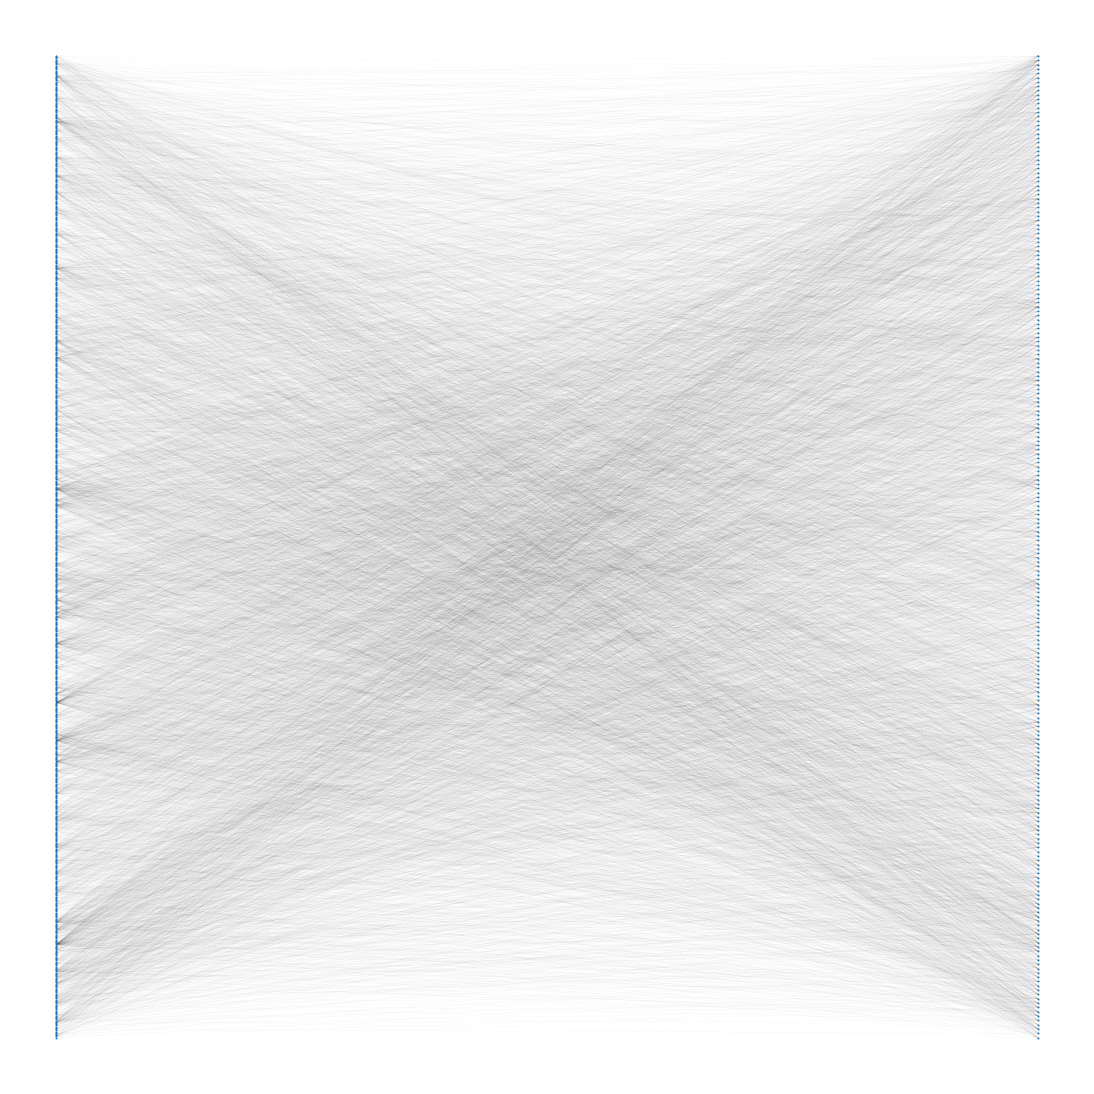

In [46]:
bipartite_graph = nx.Graph()
bipartite_graph.add_nodes_from(pollinator_dct.keys(), bipartite = 0)
pollinator_lst = list(pollinator_dct.keys())
bipartite_graph.add_nodes_from(plant_dct.keys(), bipartite = 1)
for k in pollinator_dct:
    bipartite_graph.add_edges_from((k, v) for v in pollinator_dct[k])
    
plt.figure(3,figsize=(15,15)) 
nx.draw(bipartite_graph,pos= nx.drawing.layout.bipartite_layout(bipartite_graph, pollinator_lst), node_size=1, width = 0.01)

*Here we extract a subgraph of the bipartite graph in order to plot it and understand how the bigger one works.*

In [47]:
subplant_lst = sorted(plant_dct, key=lambda x:len(plant_dct[x]))[:2]
subplant_dct = {plant : plant_dct[plant] for plant in subplant_lst}
bipartite_subgraph = nx.Graph()
bipartite_graph.add_nodes_from(subplant_lst, bipartite = 0)
subpollinator_lst = list(subplant_dct.values())[0] + list(subplant_dct.values())[1]
bipartite_graph.add_nodes_from(subpollinator_lst, bipartite = 1)
for k in subplant_lst:
    bipartite_subgraph.add_edges_from((k, v) for v in plant_dct[k])

**Drawing the subgraph**

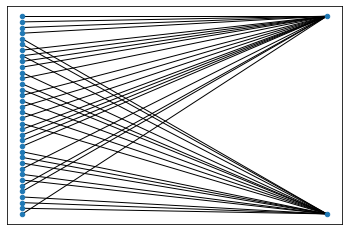

In [48]:
nx.draw_networkx(bipartite_subgraph, pos = nx.drawing.layout.bipartite_layout(bipartite_subgraph, subpollinator_lst), node_size=20, arrowsize=0.0000001, with_labels=False)

We associated the node names in the pollinators cohabitation to the real names of pollinators and we created a dictionary in order to be able to query the pollinator number and obtaining the real name. It was really funny to find out the most pollinating pollinator is a strange fly.

In [49]:
new_lst = {i : data_pollinators[int(i)] for i in list_of_names}
# print(new_lst)
print(f"Let's see which is the real name of node 0: {new_lst['0']}\n")

Let's see which is the real name of node 0: Amegilla walshii



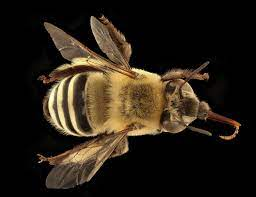

In [50]:
print(f"Who is the hub?: {new_lst['141']}")

Who is the hub?: Spallanzania hesperidarum


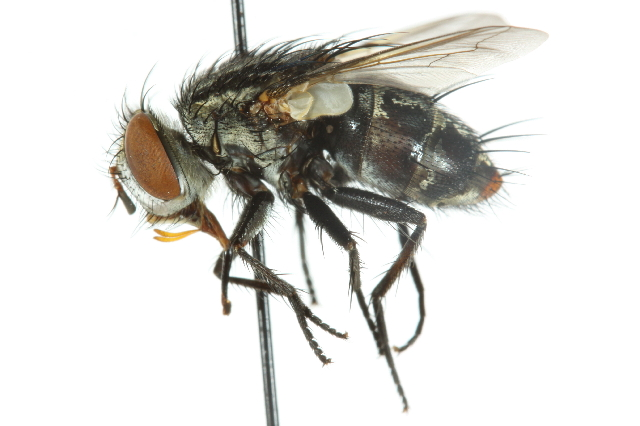

In [51]:
print(f"\nWho is the antisocial node?: {new_lst['1335']}")


Who is the antisocial node?: Idiolespa analis


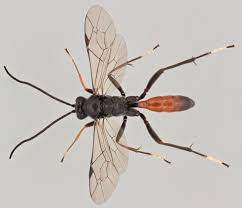

In [52]:
print(f"\nAnother antisocial node: {new_lst['609']}")


Another antisocial node: Winthemia 4-pustulata


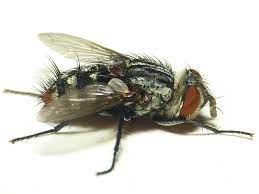

### Week 6 ###

a) Treat your graph as undirected and unweighted, and work on the resulting largest connected component.

b) Implement the following three techniques for community detection: bridge removal, modularity optimization,
and label propagation. In this case, you are allowed to use built-in functions from NetworkX.

c) Compare the results of each technique in terms of: number of detected clusters, cluster size distribution,
computational time, NMI, modularity, other aspects you consider relevant, if any.

d) Give an interpretation to the differences and similarities between the three resulting partitions, and discuss
which one you think is the best and why.

e) Optional: Provide a visualization for the three partitions using your favorite tool (e.g., NetworkX or Gephi).

a) **Largest Connected Component**

In order to detect communities we want to focus on a smaller subgraph because the largest connected component is the whole graph G and we figured out that running community detection algorithm was computationally expensive. The Bell number grows more than exponentially and computing it for $N = 1044$ can be tedious. Therefore we extract the most importante part of the graph in terms of its connectivity structure.

We apply the built-in NetworkX function k_core. 

Is the subgraph obtained with k-core connected? True
Has size: 318


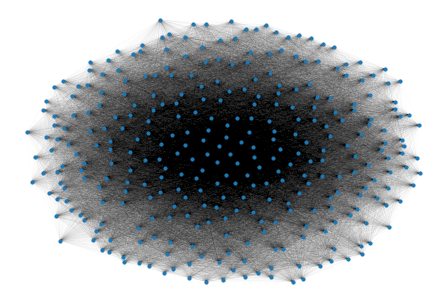

In [53]:
k_coreG = nx.k_core(G, k=188)
nx.draw_kamada_kawai(k_coreG,node_size=10,width=0.01)
booli = nx.is_connected(k_coreG)
print(f'Is the subgraph obtained with k-core connected? {booli}')
print(f'Has size: {k_coreG.number_of_nodes()}')

The subgraph generated is connected but is still too big, we tried to increase the parameter k in order to reduce the number of nodes contained in the restriction, the issue was that we reached the maximum value for k, increasing it would generate an empty graph. 

Hence we had to find a way to pick an informative subset of this graph to apply community detection methods.
Our first idea was to pick one random subset of the k-core generated graph and detect communities on that subset, the issue was that picking a random subset was not informative at all. 

We decided that in order to extrapolate general information about communities in the subset the right choice was to extract multiple random subset and compute statistics for all of them and then consider the mean. 

This way we can obtain an approximate general result without having to scan the whole k-core subgraph with 300 nodes.

We first do the procedure for one random sample, and then we proceed generalizing.

b) **Bridge Removal**


In [54]:
nodes_k_coreG = list(k_coreG.nodes())
lil_g = nx.Graph()
lil_g.add_nodes_from([1,2])
while not nx.is_connected(lil_g):
    random_sample = random.choices(nodes_k_coreG, k=50)
    lil_g = k_coreG.subgraph(random_sample)
# print(len(lil_g.nodes()))
#
def chanteclair(part):
    labels = []
    communities = []
    for i in range(len(part)):
        labels += [i] * len(part[i])
        c = part[i]
        communities.append(c)
    return labels, communities


The Bridge Removal procedure lasted: 6.16 seconds
Returned 5 communities

Here is the modularity of the partition: 0.00010842249919843503

Here we plot the cluster size distribution with two different visualizations:

Piechart


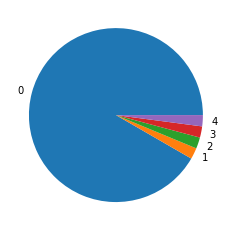

Barplot


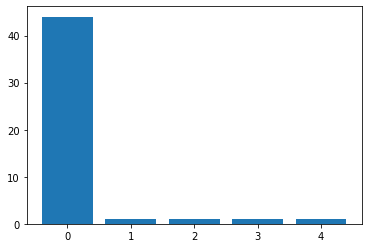

In [55]:
from sklearn.metrics.cluster import normalized_mutual_info_score
import networkx.algorithms.community as nx_comm
# Girvan-Newman algorithm


def bridge_removal(graph):
    start = timer()
    partitions = list(nx.community.girvan_newman(graph))
    modularities = [[nx.community.quality.modularity(graph, partition), partition] for partition in partitions]
    max_mod = max(modularities, key=lambda x:x[0])
    #total_length = sum(map(len, max_mod[1])
    pred_label, communities_bridge = chanteclair(max_mod[1])
    bridge_modularity = max_mod[0]
    bridge_removal_detected = len(communities_bridge)
    end = timer()
    bridge_time = end - start
    return bridge_modularity, bridge_removal_detected, bridge_time, pred_label

first_one = bridge_removal(lil_g)
print(f'\nThe Bridge Removal procedure lasted: {round(first_one[2],2)} seconds')
print(f'Returned {first_one[1]} communities')
print(f'\nHere is the modularity of the partition: {first_one[0]}')

# print(first_one)

occurrences = dict()
for i in first_one[3]:
    try:
        occurrences[i] += 1
    except:
        occurrences[i] = 1

values = [i for i in occurrences.keys()]
heights = [i for i in occurrences.values()]


print('\nHere we plot the cluster size distribution with two different visualizations:\n')
print('Piechart')
plt.pie(heights, labels = values)
plt.show();
print('Barplot')
plt.bar(values, heights)
plt.show();

 **Compute the modularity of each partition**
 
 $$ Q = \frac{1}{L} \cdot \sum_{c}(L_{c} - \frac{K_{c}^2}{4L}) $$
 
 $L = no. links$
 
 $c = i_{th}\;community$
 
 $L_c = no. links\; in\; community\;c$
 
 $K_c = total\; degree\; in\; community \; c$

**Modularity Optimization**


The Modularity Optimization procedure lasted: 0.04 seconds
Returned 2 communities

Here is the modularity of the partition: 0.04290271641596463

Here we plot the cluster size distribution with two different visualizations:

Piechart


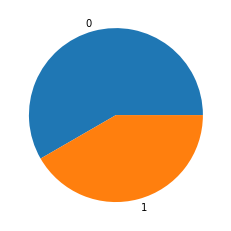

Barplot


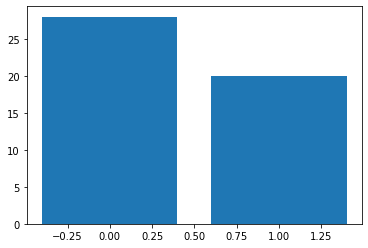

In [56]:
def modularity_optimization(graph):
    start = timer()
    partition_mod = nx.community.greedy_modularity_communities(graph)
    #total_length = sum(map(len, partition_mod))
    mod_opt_labels, communities_modularity = chanteclair(partition_mod)
    mod_opt_modularity = nx.community.quality.modularity(graph, [list(i) for i in partition_mod])
    mod_opt_detected = len(communities_modularity)
    end = timer()
    mod_opt_time = round(end - start,2)
    return mod_opt_modularity, mod_opt_detected, mod_opt_time, mod_opt_labels

second_one = modularity_optimization(lil_g)

print(f'\nThe Modularity Optimization procedure lasted: {round(second_one[2],2)} seconds')
print(f'Returned {second_one[1]} communities')
print(f'\nHere is the modularity of the partition: {second_one[0]}')

occurrences = dict()
for i in second_one[3]:
    try:
        occurrences[i] += 1
    except:
        occurrences[i] = 1

values = [i for i in occurrences.keys()]
heights = [i for i in occurrences.values()]


print('\nHere we plot the cluster size distribution with two different visualizations:\n')
print('Piechart')
plt.pie(heights, labels = values)
plt.show();
print('Barplot')
plt.bar(values, heights)
plt.show();


# NMI_mod_opt = sklearn.metrics.normalized_mutual_info_score(true_labels, mod_opt_labels)
# print(f'\nHere is the NMI for Modularity Optimization: {NMI_mod_opt}')

**Label Propagation**


The Label Propagation procedure lasted: 0.03 seconds
Returned 1 community

Here is the modularity for the partition: 0.0

Here we plot the cluster size distribution with two different visualizations:

Piechart


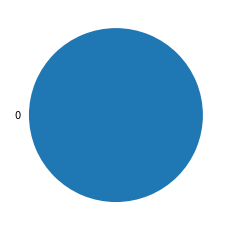

Barplot


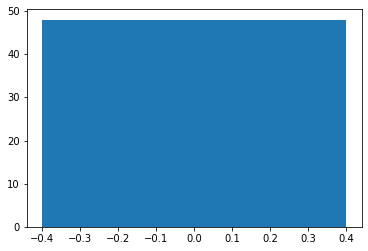

In [57]:
def label_propagation(graph):
    start = timer()
    communities = nx.community.asyn_lpa_communities(graph)
    partition_lp = [frozenset(c) for c in communities]
    #total_length = sum(map(len, partition_lp))
    label_labels, communities_label = chanteclair(partition_lp)
    label_modularity = nx.community.quality.modularity(graph, [list(i) for i in partition_lp])
    label_propagation_detected = len(communities_label)
    end = timer()
    label_prop_time = round(end - start,2)
    return label_modularity, label_propagation_detected, label_prop_time, label_labels

third_one = label_propagation(lil_g)

print(f'\nThe Label Propagation procedure lasted: {round(third_one[2],2)} seconds')
print(f'Returned {third_one[1]} community')
print(f'\nHere is the modularity for the partition: {third_one[0]}')

occurrences = dict()
for i in third_one[3]:
    try:
        occurrences[i] += 1
    except:
        occurrences[i] = 1

values = [i for i in occurrences.keys()]
heights = [i for i in occurrences.values()]


print('\nHere we plot the cluster size distribution with two different visualizations:\n')
print('Piechart')
plt.pie(heights, labels = values)
plt.show();
print('Barplot')
plt.bar(values, heights)
plt.show();


c) **Compare the results**

In [58]:
# creating a dataframe to store the values we got for each method
comparison_df = pd.DataFrame()
comparison_df['Compare'] = np.array(['Bridge Removal', 'Modularity Optimization', 'Label Propagation'])

comparison_df["Modularity"] = [first_one[0], second_one[0], third_one[0]]
comparison_df["Computational_Time"] = [first_one[2],second_one[2], third_one[2]]
comparison_df['Number_Detected_Clusters'] = [first_one[1], second_one[1], third_one[1]]
display(comparison_df.head())

,Compare,Modularity,Computational_Time,Number_Detected_Clusters
0,Bridge Removal,0.000108,6.16302,5
1,Modularity Optimization,0.042903,0.04000,2
2,Label Propagation,0.000000,0.03000,1


We want to compare the community detected using the Normalized Mutual Information.

In [59]:
from sklearn.metrics.cluster import normalized_mutual_info_score

NMI_1 = normalized_mutual_info_score(first_one[3], second_one[3])
NMI_2 = sklearn.metrics.normalized_mutual_info_score(first_one[3], third_one[3])
NMI_3 = sklearn.metrics.normalized_mutual_info_score(second_one[3], third_one[3])
print(f'The Normalized Mutual Information between Bridge Removal and Modularity Optimization: {NMI_1}')
print(f'\nThe Normalized Mutual Information between Bridge Removal and Label Propagation: {NMI_2}')
print(f'\nThe Normalized Mutual Information between Modularity Optimization and Label Propagation: {NMI_3}')

The Normalized Mutual Information between Bridge Removal and Modularity Optimization: 0.14485636268738802

The Normalized Mutual Information between Bridge Removal and Label Propagation: 0.0

The Normalized Mutual Information between Modularity Optimization and Label Propagation: 0.0


d) **Doing the latter several times**

We noticed that picking just one random sample wouldn't give us any information about the k_coreG so we developed a function that iterates multiple time saving for each random sample: no. cluster detected, nmi and modularity using the three community detections methods and then returns the average.

We left the method apply to just one random sample to understand better what the ensemble does.


In [60]:
def hyperlooper(n, graph):
    
    bridge_modularities = []
    communities_bridge = []
    bridge_times = []
    mod_opt_modularities = [] 
    communities_modularity = []
    mod_opt_times = []
    label_modularities = []
    communities_label = []
    label_prop_times = []
    
    for i in range(n):
        nodes_graph = list(graph.nodes())
        lil_g = nx.Graph()
        lil_g.add_nodes_from([1,2])
        while not nx.is_connected(lil_g):
            random_sample = random.choices(nodes_graph, k=50)
            lil_g = graph.subgraph(random_sample)
        
        bridge_modularity, bridge_removal_detected, bridge_time,_ = bridge_removal(lil_g)
        
        mod_opt_modularity, mod_opt_detected, mod_opt_time,_ = modularity_optimization(lil_g)
        
        label_modularity, label_propagation_detected, label_prop_time,_ = label_propagation(lil_g)
        
        bridge_modularities.append(bridge_modularity)
        communities_bridge.append(bridge_removal_detected)
        bridge_times.append(bridge_time)
        mod_opt_modularities.append(mod_opt_modularity)
        communities_modularity.append(mod_opt_detected)
        mod_opt_times.append(mod_opt_time)
        label_modularities.append(label_modularity)
        communities_label.append(label_propagation_detected)
        label_prop_times.append(label_prop_time)
        
    bridge_modularities_mean = np.mean(bridge_modularities)
    communities_bridge_mean = np.mean(communities_bridge)
    bridge_times_mean = np.mean(bridge_times)
    mod_opt_modularities_mean = np.mean(mod_opt_modularities)
    communities_modularity_mean = np.mean(communities_modularity)
    mod_opt_times_mean = np.mean(mod_opt_times)
    label_modularity_mean = np.mean(label_modularity)
    communities_label_mean = np.mean(communities_label)
    label_prop_times_mean = np.mean(label_prop_times)
    bridges = [bridge_modularities_mean, communities_bridge_mean, bridge_times_mean]
    mod_opt = [mod_opt_modularities_mean, communities_modularity_mean, mod_opt_times_mean]
    labels = [label_modularity_mean,communities_label_mean, label_prop_times_mean]
    
    return bridges, mod_opt, labels

fine = hyperlooper(30, k_coreG)

In [61]:
# creating a dataframe to store the hyperlooop mean values
hyperloop_df = pd.DataFrame()
hyperloop_df['Compare-Mean'] = np.array(['Bridge Removal', 'Modularity Optimization', 'Label Propagation'])

hyperloop_df["Modularity_Mean"] = [fine[0][0], fine[1][0], fine[2][0]]
hyperloop_df["Computational_Mean"] = [round(fine[0][2],2),round(fine[1][2],2), round(fine[2][2],2)]
hyperloop_df['Mean_Detected_Clusters'] = [round(fine[0][1],2), round(fine[1][1],2), round(fine[2][1],2)]
display(hyperloop_df.head())

,Compare-Mean,Modularity_Mean,Computational_Mean,Mean_Detected_Clusters
0,Bridge Removal,0.001544,5.25,6.87
1,Modularity Optimization,0.045949,0.04,2.13
2,Label Propagation,0.000000,0.03,1.00


From the analysis of the mean we can see that community detection methods act in a different way, label propagation fail to identify community in such a small graph while the other two can be used to segment the graph into community. The longest to compute is Bridge Removal, this method even tough beats the other on detected clusters fail, segmenting the graph into one giant component and other singletons. The most reliable method in order to detect community in such a small graph is probably modularity optimization both for the computational time and the quality of the partition.

### Week 7 ###

a) Treat your graph as undirected and unweighted, and work on the resulting largest connected component.

b) Implement a function to compute the following topological similarity indices: CN, JI, PA, AA, RA. You are
allowed to use built-in functions from NetworkX for computing individual indices. Your function should take as
input a graph G, and a list of indices in the form of strings. The output should be a DataFrame with node pairs as
rows and the five topological indices as columns. [NB: you should only include unconnected node pairs in the
final DataFrame. You can choose whether to filter out observed links within your function or ex post.]

c) Compute 6 link likelihood scores: one for each of the five indices, and one obtained as the arithmetic mean of
the indices. [NB: the arithmetic mean should be computed after rescaling each column between 0 and 1.]

d) For each of the 6 scores, identify as missing links the node pairs yielding the largest 10 values. Briefly
comment the results.

e) Optional: Build a function to compute the Katz Index, use it as an additional link likelihood score, and
compare the results you get with those coming from the local indices.


In order to compute the common neighbors we will need all the possible missing edges.

(!! Our first approach was to create a set of all possible edges and subtract the set of edges
we have in the graph, but it was really time consuming.)

We used the complement of G to save the missing edges.

**Common Neighbors**

$$ CN(x,y) = |\Gamma(x) \cap \Gamma(y)| $$

In [62]:
graph_complement = nx.complement(G)
missing_edges = graph_complement.edges()

# counter= 0
# for i in missing_edges:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

In [63]:
counter = 0
list_of_cn = []

for i in missing_edges:
    cn_gen = nx.common_neighbors(G, i[0], i[1])
    list_of_cn.append(sum(1 for _ in cn_gen))

# for i in list_of_cn:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

In [64]:
cns_array0 = np.array(list_of_cn)
cn_min = np.min(cns_array0)
cn_max = np.max(cns_array0)
cns_array = (cns_array0 - cn_min)/(cn_max - cn_min)
cns_list = list(cns_array)
# print(cns_array)

**Jaccard Index**

$$ JI(x,y) = \frac{\Gamma(x)\cap \Gamma(y)}{\Gamma(x)\cup \Gamma(y)}$$

In [65]:
# Jaccard index
jis = list(nx.jaccard_coefficient(G))
jis = [i[2] for i in jis]
counter = 0
# for i in jis:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

**Preferential Attachment**

$$ PA(x,y) = |\Gamma(x) \cdot \Gamma(y)| $$

In [66]:
# Preferential attachment index
pas = list(nx.preferential_attachment(G))
pas = [i[2] for i in pas]
counter = 0
# for i in pas:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

In [67]:
pas_array0 = np.array(pas)
pas_min = np.min(pas)
pas_max = np.max(pas)
pas_array = (pas_array0 - pas_min)/(pas_max - pas_min)
pas_list = list(pas_array)
# print(pas_array

**Adamic Adar**

$$ AA(x,y) = \sum_{z\in \Gamma(x) \cap \Gamma(y)} \frac{1}{log(|\Gamma(z)|)} $$

In [68]:
# Adamic-Adar index
aas = list(nx.adamic_adar_index(G))
aas = [i[2] for i in aas]
counter = 0
# for i in aas:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

In [69]:
aas_array0 = np.array(aas)
aas_min = np.min(aas)
aas_max = np.max(aas)
aas_array = (aas_array0 - aas_min)/(aas_max - aas_min)
aas_list = list(aas_array)
# print(aas_array)

**Resource Allocation**

$$ RA(x,y) = \sum_{z\in \Gamma(x) \cap \Gamma(y)} \frac{1}{|\Gamma(z)|} $$

In [70]:
# Resource allocation index
ras = list(nx.resource_allocation_index(G))
ras = [i[2] for i in ras]
counter = 0
# for i in ras:
#     print(i)
#     counter +=1
#     if counter == 15:
#         break

In [71]:
ras_array0 = np.array(ras)
ras_min = np.min(ras)
ras_max = np.max(ras)
ras_array = (ras_array0 - ras_min)/(ras_max - ras_min)
ras_list = list(ras_array)
# print(ras_array)

**Building the Dataframe**

Now we just use the topological indices computed and normalized to construct a dataframe.
We will then use their each of them and the mean of all of them to predict missing links.

$$ Mean(x,y) = \frac {CN_{normalized}(x,y) + JI(x,y) + PA_{normalized}(x,y) + AA_{normalized}(x,y) + RA_{normalized}(x,y)}{5}$$

In [72]:
df = pd.DataFrame()
df['Pairs'] = missing_edges
df['CN'] = cns_list
df['JI'] = jis
df['PA'] = pas_list
df['AA'] = aas_list
df['RA'] = ras_list
df['Mean'] = df.iloc[:, [1,2,3,4]].mean(axis=1)
df['CN'] = cns_array0
df['JI'] = jis
df['PA'] = pas_array0
df['AA'] = aas_array0
df['RA'] = ras_array0


display(df)

Pairs   CN        JI      PA         AA        RA      Mean
0    3         (0, 3)   24  0.075235   12382   3.996435  0.063838  0.053970
     22       (0, 22)   75  0.058824   12080   3.151022  0.052441  0.077374
     25       (0, 25)  149  0.248722  130162  24.825816  0.449520  0.312608
     50       (0, 50)  185  0.068768   21442   3.813871  0.045979  0.153565
     88       (0, 88)   94  0.142857   70668  11.188938  0.183939  0.171629
...               ...  ...       ...     ...        ...       ...       ...
46   655    (46, 655)    2  0.108225   15600   3.936981  0.044610  0.050712
     722    (46, 722)    3  0.211957   45240  12.679208  0.172634  0.124533
1117 655  (1117, 655)    2  0.196078  108888  23.204211  0.354671  0.193294
     722  (1117, 722)    3  0.232804   84708  21.831359  0.331226  0.184198
655  722   (655, 722)    1  0.245902   58656  17.050425  0.229832  0.154641

[429024 rows x 7 columns]

In [73]:
cn_missing_links = df.nlargest(10, ['CN'])
ji_missing_links = df.nlargest(10, ['JI'])
pa_missing_links = df.nlargest(10, ['PA'])
aa_missing_links = df.nlargest(10, ['AA'])
ra_missing_links = df.nlargest(10, ['RA'])
Mean_missing_links = df.nlargest(10, ['Mean'])

In [74]:
print('\nMissing links for the Common Neighbors index: ')
print(list(cn_missing_links['Pairs']))


Missing links for the Common Neighbors index: 
[(867, 1215), (467, 852), (1071, 1033), (119, 1362), (1191, 219), (142, 864), (867, 1096), (191, 467), (274, 1105), (310, 457)]


In [75]:
print('\nMissing links for the Jaccard index: ')
print(list(ji_missing_links['Pairs']))


Missing links for the Jaccard index: 
[(714, 840), (255, 1310), (603, 1291), (1199, 518), (310, 307), (299, 1065), (493, 567), (379, 587), (884, 899), (984, 926)]


In [76]:
print('\nMissing links for the Preferential Attachment index: ')
print(list(pa_missing_links['Pairs']))


Missing links for the Preferential Attachment index: 
[(329, 1289), (324, 779), (884, 899), (304, 350), (324, 1020), (324, 419), (329, 998), (830, 6), (841, 1006), (324, 638)]


In [77]:
print('\nMissing links for the Adamic Adar index: ')
print(list(aa_missing_links['Pairs']))


Missing links for the Adamic Adar index: 
[(884, 899), (255, 1310), (1199, 518), (329, 1289), (299, 1010), (592, 757), (884, 413), (841, 1006), (493, 567), (714, 840)]


In [78]:
print('\nMissing links for the Resource Allocation index: ')
print(list(ra_missing_links['Pairs']))


Missing links for the Resource Allocation index: 
[(884, 899), (329, 1289), (324, 779), (841, 1006), (1199, 518), (830, 6), (884, 413), (255, 1310), (592, 757), (299, 1010)]


In [79]:
print('\nMissing links for the Common Mean index: ')
print(list(Mean_missing_links['Pairs']))


Missing links for the Common Mean index: 
[(274, 178), (324, 779), (841, 1006), (195, 1081), (255, 1310), (273, 222), (329, 1289), (884, 899), (220, 482), (592, 757)]


We noticed that considering different measures some missing links repeat several times, hence we decided to label as missing the ones that were yielded by at least 4 indices. In this way we picked the top tier missing links for our graph, being less conservative we can just decrease the number of measures needed.

In [80]:
missing_links = list(cn_missing_links['Pairs']) + list(ji_missing_links['Pairs']) + \
                list(pa_missing_links['Pairs']) + list(ra_missing_links['Pairs']) + \
                list(aa_missing_links['Pairs']) + list(Mean_missing_links['Pairs'])

missing_links = [str(i) for i in missing_links]
weights = {}
for i in missing_links:
    try:
        weights[i] += 1
    except:
        weights[i] = 1

considered_ones = [i[0] for i in weights.items() if i[1] > 3]
print(f'\nBeing conservative we would consider missing edges only pairs yielded by at least 4 indices:\n {considered_ones}')


Being conservative we would consider missing edges only pairs yielded by at least 4 indices:
 ['(255, 1310)', '(884, 899)', '(329, 1289)', '(841, 1006)']


### Week 9 ###

Depending on what seems more appropriate in your graph, pick one of the following random graph

a) Erdős–Rényi,

b) Uniform Attachment,

c) Preferential attachment,

d) One variant of any of the previous model invented by you (best option).

**We generate the random graph with a variant of the configuration model**

We know that we need to generate a connected graph with an average degree of $221.11$, we know that the average degree can be computed as:

$$ <k> = \frac{2L}{N} $$

Choosing a number of nodes N we want to compute the necessary number of edges

$$ \frac{N \cdot <k>}{2} = {L} $$

Our generator takes as input the number of nodes, the average degree and the minimum degree, we wanted to build a generator capable of creating a graph with any number of nodes respecting our average degree. It does that by computing the number of edges as the number of nodes multiplied by the average degree, then compute the leftover subtracting the minimum degree multiplied by the number of nodes. Using the leftover construct the list of degrees and use the latter to apply the configuration model.

We chose to do that because we wanted a model capable of generalize to different size of number of nodes. 

Below we generate a random graph with the stats from our original graph.

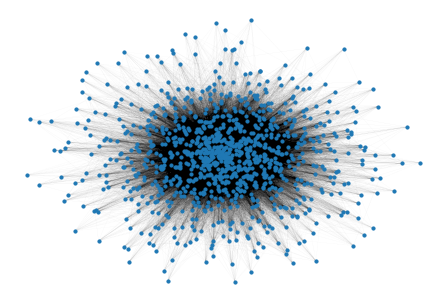

In [81]:
import random
import networkx as nx

def random_graph_generator(N_nodes, avg_degree, min_degree):
    Edges = (int(N_nodes) * int(avg_degree))
    N = Edges - min_degree * N_nodes
    array = sorted([random.randint(0, N + 1) for i in range(N_nodes)])
    array.append(N)
    array[0] = 0
    list_of_degrees = [j - i + min_degree for(i, j) in zip(array[0:N_nodes], array[1:N_nodes + 1])]
#     print(list_of_degrees)
    RG = nx.configuration_model(list_of_degrees)
    return RG

RG = random_graph_generator(N, avg_degree, np.min(list_of_sums))
nx.draw(RG,node_size = 10, width = 0.01)

We created a generator that given a number of nodes, an average degree and a minimum degree generate a random graph with the configuration model, we decided to use this model because it allow to create "Small-World" like networks with numerical properties similar to the original node. 

In this case as parameters for the generator we used values taken from the original graph.
Let's make some more in depth analysis to see whether the random graph is a good faucet of the original one.

In [82]:
print('\nInformation about the random graph.\n')
print('G is an undirected, unweighted graph.\n')
r_booli = nx.is_connected(RG)
print(f'Is the graph G connected?: {r_booli}\n')
r_boole = nx.is_weighted(RG)
# print(f'Is the graph G weighted?: {boole}\n')

r_L = RG.number_of_edges()
print(f'    #Edges: {r_L}\n')

r_N = RG.number_of_nodes()
print(f'    #Nodes: {r_N}\n')

r_avg_degree = round(2*r_L / r_N,2)
print(f'    Average Degree: {r_avg_degree}\n')

r_density = round(avg_degree / (r_N - 1),2)
print(f'    Density: {r_density}\n')


Information about the random graph.

G is an undirected, unweighted graph.

Is the graph G connected?: True

    #Edges: 115362

    #Nodes: 1044

    Average Degree: 221.0

    Density: 0.21



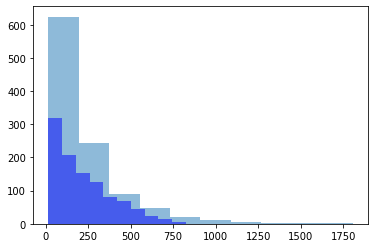

In [83]:
r_adj_matrix = nx.to_numpy_matrix(RG,dtype='int64')
# print(adj_matrix)
r_degree_centrality = np.sum(r_adj_matrix, axis=0)
r_degree_centrality = r_degree_centrality.tolist()[0]
plt.hist(r_degree_centrality, alpha=0.5); #generated graph degree centralities
plt.hist(degree_centralities, facecolor ='blue', alpha=0.5); #original graph degree centralities

In [84]:
r_avg_distance_length = nx.average_shortest_path_length(RG)
print(f'\nAverage Distance Length: {round(r_avg_distance_length,2)}\n')

r_diameter = nx.diameter(RG)
print(f'Diameter: {r_diameter}')


Average Distance Length: 1.85

Diameter: 3


In general we are happy with the result, because the model is simple and not computationally intensive but still gives pretty awesome results, the diameter is the same as the original graph and the average distance length differ by an error of -2.*%. 

The degree distribution is a little bit too high, we could say the generator build a boosted version of the original graph. 

### Week 10 ###

a) Depending on what seems more relevant in your graph. Write the code for one of
the alternative model not covered today.

- Threshold model synchroneous,
- Threshold model asynchroneous (random order),
- Fractional Threshold model synchroneous,
- Fractional Threshold model (random order).
- Independent Cascade model,
- Bass contagion model,
- SIS model,
- A variant that seems pertinent in your graph (Best choice).

Flower sharing amongst pollinator species represents a conduit for interspecific insect pathogen transmission.

We wanted to understand the contagion, modelling how insects can spread diseases among them via plants.

In [85]:
def SIS_simulation(G, I, T, beta, mu, draw = False, pie = False, print_= False, check = False):
    
    N = G.number_of_nodes()
    infected = len(I)                     #initial number of infected
    susceptibles = N - infected           #initial number of susceptible
    
    
    for node in G.nodes():                #labeling each node with the corresponding category
        if node in I:
            G.nodes[node]['category'] = 'Infected'
        else: 
            G.nodes[node]['category'] = 'Susceptible'

    color_map = {'Susceptible': 'g', 'Infected': 'r'}
    
    if draw == True:
        nx.draw_kamada_kawai(G, node_size = 10, width = 0.01, node_color=[color_map[G.nodes[node]['category']] for node in G])
        plt.show()
    
    for t in range(T):
        for node in G.nodes():
            if G.nodes[node]['category'] == 'Infected' and random.uniform(0,1) <= mu:    #node recovers with propability mu
                G.nodes[node]['category'] = 'Susceptible'
                infected -= 1
                susceptibles += 1
                if infected < 1:
                    break
            elif G.nodes[node]['category'] == 'Susceptible':
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['category'] == 'Infected' and random.uniform(0,1) <= beta:    #node is infected with propability beta by each of its neighbours
                        G.nodes[node]['category'] = 'Infected'
                        susceptibles -= 1
                        infected += 1
                        break
        heights = [susceptibles, infected]
        
        if print_:
            print(f't = {t+1} susceptible = {susceptibles} infected = {infected}')
        if check:
            if infected > 760 and infected < 860: 
                print(t + 1,True)                       
            else:                                 
                print(t + 1,False)                      
            
        if draw:
            nx.draw_kamada_kawai(G, node_size = 10, width = 0.01, node_color = [color_map[G.nodes[node]['category']] for node in G])
            plt.show()
        if pie:    
#             print(t)
            plt.pie(heights, labels = ['susceptible', 'infected'])
            plt.show()
    
    return susceptibles, infected, G

We chose the parameter beta and mu in order to avoid the contagion to be immediate, considering that the graph has an average degree of $221$ this means that with beta = 1/200 it is very likely for a node to infect a neighbor, the recovery rate is set at 1/10 because we want that each node has a possibility to recover each 10 periods.

In [86]:
T = 20
beta = 1/200
mu = 1/10
infected_lst = random.choices(list(G.nodes()), k = 4)

print(infected_lst)

[435, 1117, 480, 275]


Below we run a graphical representation with t = 5

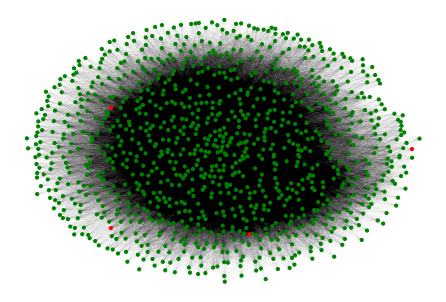

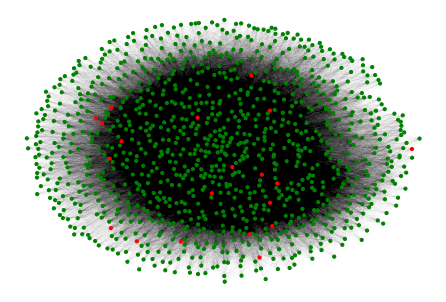

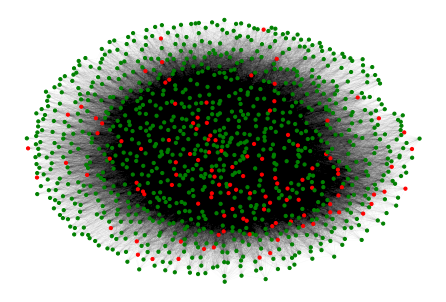

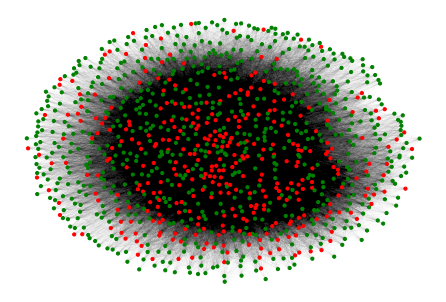

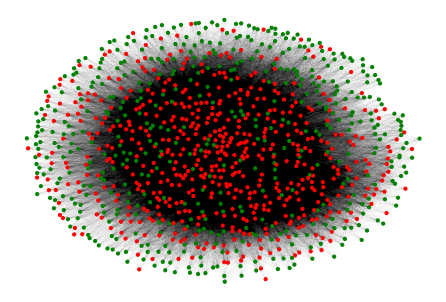

(481, 563, <networkx.classes.graph.Graph object at 0x0000024CAE130630>)


In [87]:
print(SIS_simulation(G, infected_lst, 4, beta, mu, True))

We run the simulation with a random initial outbreak of size $4$ and $t = 20$, considering the small world feature of our graph we chose parameters in order to avoid the contagion to spread immediately. Since the nodes picked are $4$ we are pretty confident that at least one of the four belong to the central part of the graph, hence it belongs to k_coreG.


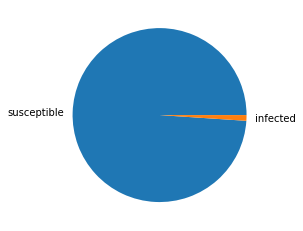

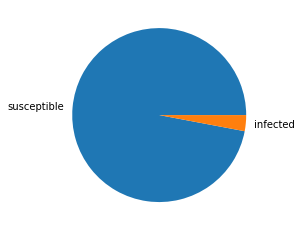

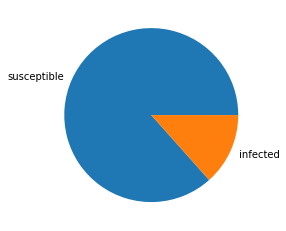

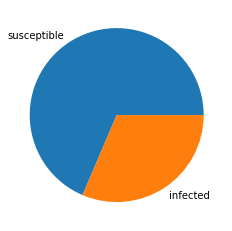

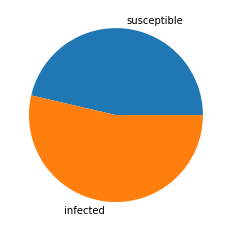

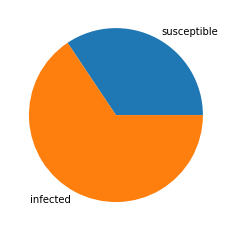

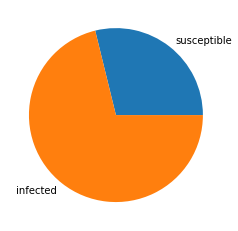

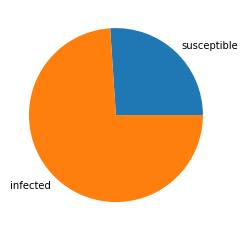

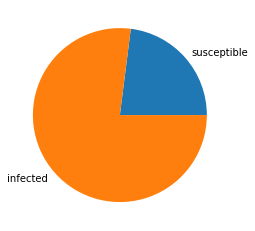

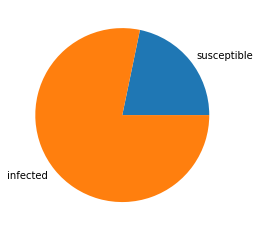

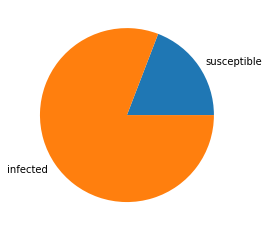

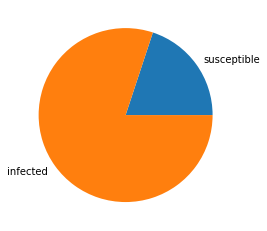

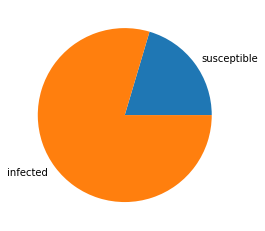

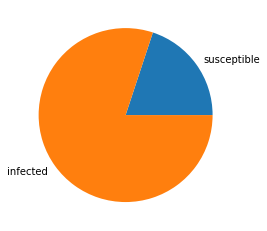

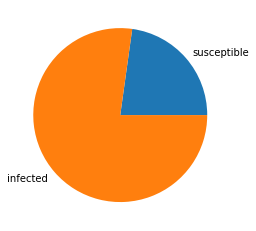

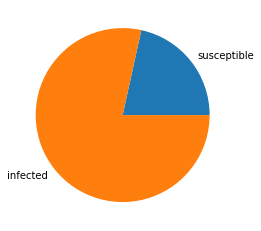

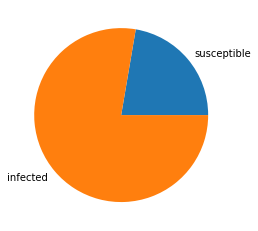

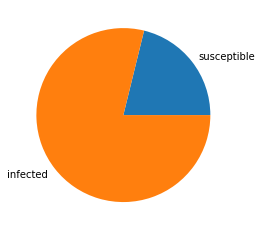

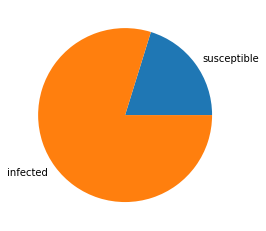

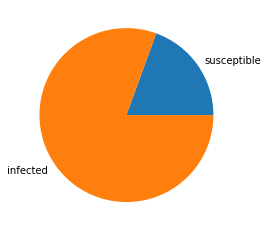

In [88]:
simulation_G = SIS_simulation(G, infected_lst, T, beta, mu, False, True)

After running with several T we noticed that the simulation never converge, but still we found that after $ t = 7 $ the quantities starts varying in a certain range.

It can be interesting to understand what is this range.

In [89]:
simulation_G = SIS_simulation(G, infected_lst, 15, beta, mu, False, False, True)

t = 1 susceptible = 1030 infected = 14
t = 2 susceptible = 992 infected = 52
t = 3 susceptible = 824 infected = 220
t = 4 susceptible = 576 infected = 468
t = 5 susceptible = 412 infected = 632
t = 6 susceptible = 312 infected = 732
t = 7 susceptible = 283 infected = 761
t = 8 susceptible = 277 infected = 767
t = 9 susceptible = 260 infected = 784
t = 10 susceptible = 247 infected = 797
t = 11 susceptible = 253 infected = 791
t = 12 susceptible = 232 infected = 812
t = 13 susceptible = 228 infected = 816
t = 14 susceptible = 203 infected = 841
t = 15 susceptible = 209 infected = 835


After $t = 7$ the quantity of infected ranges between 760 and 860 (holds for beta = 1/200 and mu = 1/10). Changing the parameter mu the same will happen but with another range of infected.

We can check by uncommenting the code below.

In [90]:
# simulation_G = SIS_simulation(G, infected_lst, 15, beta, mu, False, False, False, True)

**Understanding how the contagion spread**

We feel that in order to understand how the infection properly evolve we want to understand what happen generally in the central part of our graph (k_coreG) which can be considered the most guilty for the contagion. 

We decided that since we are picking only one node picking it in k_coreG would have been the best choice.

We picked 1000 times k_coreG with random initial outbreak of size 1, it is important to notice that the size of k_coreG is 318 while the size of the original graph is 1044. We built a function to compute the final number of infected and susceptibles at t = 20 for each of the iterations and then return the mean of all the samples.

We want to check that at t = 20 the mean final configuration of k_coreG multiplied by $\frac{1044}{318} $ is approximately the final configuration of the original graph.

In [91]:
def sis_looper(n, k_c):
    
    sis_outcomes = []
    
    for i in range(n):
        infected_lst = random.choices(list(k_coreG.nodes()), k = 1)
        sample = SIS_simulation(k_coreG, infected_lst, T, beta, mu, False, False)
        sis_outcomes.append(sample)
        
    mean_susceptibles = sum(i[0] for i in sis_outcomes) / n
    mean_infected = sum(i[1] for i in sis_outcomes) / n
    return mean_susceptibles, mean_infected

In [92]:
sis_outcomes = sis_looper(1000, k_coreG)
# print(sis_looper(100, k_coreG))

In [93]:
print(f' The number of susceptible nodes at time {T} is: {sis_outcomes[0]}')
print(f' The number of infected nodes at time {T} is: {sis_outcomes[1]}')

 The number of susceptible nodes at time 20 is: 67.428
 The number of infected nodes at time 20 is: 250.572


From this final simulation we can see that on average activating one single node in the k_coreG component of the original graph we obtain a similar configuration at t = 20. We can check that:
$$ |final\;config\;G| \approx |final\;config\;{k_{core}G} \cdot \frac{1044}{318}|$$

In [94]:
print(f'No. susceptible at time {T} in the original graph is: {simulation_G[0]}\n')
print(f'No. infected at time {T} in the original graph is: {simulation_G[1]}\n')
print('We can compare it with the k_core simulation mean multiplied by 1044/318\n')

print(f'Mean susceptible at time {T} in the k_core simulations is: {sis_outcomes[0]}')
print(f'Multiplying the latter by 1044/318: {round(sis_outcomes[0] * (1044/318),2)}\n')
print(f'Mean infected at time {T} in the k_core simulations is: {sis_outcomes[1]}')
print(f'Multiplying the latter by 1044/318: {round(sis_outcomes[1] * (1044/318),2)}')

No. susceptible at time 20 in the original graph is: 209

No. infected at time 20 in the original graph is: 835

We can compare it with the k_core simulation mean multiplied by 1044/318

Mean susceptible at time 20 in the k_core simulations is: 67.428
Multiplying the latter by 1044/318: 221.37

Mean infected at time 20 in the k_core simulations is: 250.572
Multiplying the latter by 1044/318: 822.63


We want to understand if initializing the outbreak with nodes belonging do k_coreG has an impact on the time it needs to reach the range 760-860.

In [95]:
infected_lst = random.choices(list(k_coreG.nodes()), k = 4)

simulation_G = SIS_simulation(G, infected_lst, 15, beta, mu, False, False, False, True)

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True


Initializing all the nodes we can be confident to have reached the range at time $ t = 7 $.

Let's check initializing all the four nodes picking them from the complement of k_coreG, hence in the least connected component of our graph. 

In [96]:
infected_lst = random.choices(list(nx.complement(k_coreG).nodes()), k = 4)

simulation_G = SIS_simulation(G, infected_lst, 15, beta, mu, False, False, False, True)

1 False
2 False
3 False
4 False
5 False
6 False
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True


We can say the result is not significant, there is no difference in speed of contagion between the simulation initialized within k_coreG and the simulation initialized in its complement. This result makes sense because we should remember that the diameter of the original graph is 3.

In the end we wanted to check the difference of initializing the outbreak on the most connected node of the graph with respect of initializing the outbreak on the least connected node of the graph. Hence we did it several times and we computed the average.

In [97]:
most_connected_node = max(G.degree(), key = lambda x:x[1])[0]
least_connected_node = min(G.degree(), key = lambda x:x[1])[0]

def silly_looper(sis, n, node):
    
    sample = []
    
    for i in range(n):
        sample.append(sis(G, [node], T, beta, mu))
    
    s_mean = sum(j[0] for j in sample) / n
    i_mean = sum(j[1] for j in sample) / n
    return s_mean, i_mean

most_connected_results = silly_looper(SIS_simulation, 100, most_connected_node)
least_connected_results = silly_looper(SIS_simulation, 100, least_connected_node)
print('k_coreG initial outbreak\n')
print(f'The contagion starting from the most connected node yields: {most_connected_results[0]} susceptible and {most_connected_results[1]} infected')
print(f'The contagion starting from the least connected node yields: {least_connected_results[0]} susceptible and {least_connected_results[1]} infected')

k_coreG initial outbreak

The contagion starting from the most connected node yields: 265.63 susceptible and 778.37 infected
The contagion starting from the least connected node yields: 651.59 susceptible and 392.41 infected


The result are really interesting after the same number of periods the most connected node yielded a quantity similar to the ones we observed before ranging between 760 and 860 infected. On the contrary initializing the least connected node the quantity of infected is completely different from the ones seen before. 